In [1]:
from bg import *

In [2]:
bgsys = system([])

In [3]:
bonds = []
#bonds.append(bond( 16 ,   'SE', '1J-5'  , 'R' , 'L'))
bonds.append(bond( 15 ,    'I', '1J-5'  , 'L' , 'L'))
bonds.append(bond( 14 , '1J-5', 'TF.Ab'  , 'L' , 'L'))
bonds.append(bond( 13 ,'TF.Ab', '1J-4'  , 'L' , 'L'))
bonds.append(bond( 12 ,   'Rb', '1J-4'  , 'R' , 'L'))

In [4]:
bonds.append(bond.from_bond_string('[SE   ]  <__16__ | [1J-5 ]' ))
bonds.append(bond.from_bond_string('[1J-4 ] |<__11__   [0J-1 ]' ))
bonds.append(bond.from_bond_string('[0J-1 ] | __10__>  [1J-3 ]' ))
bonds.append(bond.from_bond_string('[Rv40 ]  <__ 9__ | [1J-3 ]' ))
bonds.append(bond.from_bond_string('[1J-3 ] | __ 8__>  [Rl40 ]' ))
bonds.append(bond.from_bond_string('[1J-3 ] | __ 7__>  [0J-2 ]' ))
bonds.append(bond.from_bond_string('[1J-2 ] | __ 6__>  [Cacc1]' ))
bonds.append(bond.from_bond_string('[Rp2  ]  <__ 5__ | [1J-2 ]' ))
bonds.append(bond.from_bond_string('[0J-2 ] | __ 4__>  [1J-2 ]' ))
bonds.append(bond.from_bond_string('[0J-2 ]   __ 3__>| [1J-1 ]' ))
bonds.append(bond.from_bond_string('[1J-1 ]   __ 2__>| [Rp3  ]' ))
bonds.append(bond.from_bond_string('[1J-1 ] | __ 1__>  [Cacc2]' ))

bonds.append(bond.from_bond_string('[1J-5 ] | __17__>  [TF.an]' ))
bonds.append(bond.from_bond_string('[TF.an] | __18__>  [1J-6 ]' ))
bonds.append(bond.from_bond_string('[Ra   ]  <__19__ | [1J-6 ]' ))
bonds.append(bond.from_bond_string('[1J-6 ] | __20__>  [Rv70 ]' ))
bonds.append(bond.from_bond_string('[1J-6 ] | __21__>  [Rv20 ]' ))
bonds.append(bond.from_bond_string('[1J-6 ] | __22__>  [0J-1 ]' ))

In [5]:
for bond in bonds:
    bgsys.add_bond(bond)

print(bgsys)

In [6]:
nbrs = bgsys.get_nbrs('TF.Ab')
# print(bgsys.elem_nbrs)
print(nbrs)

['1J-5', '1J-4']


In [7]:
e = element('Rb')

In [8]:
print(element('0J-5').etype)

0J


In [9]:
#[{self.nls:5s}] {CSL}{PEL}__{self.num:2d}__{PER}{CSR} [{self.nrs:5s}]

In [10]:

for b in bonds:
    print(b)

[I    ] |<__15__   [1J-5 ]
[1J-5 ] |<__14__   [TF.Ab]
[TF.Ab] |<__13__   [1J-4 ]
[Rb   ]  <__12__ | [1J-4 ]
[SE   ]  <__16__ | [1J-5 ]
[1J-4 ] |<__11__   [0J-1 ]
[0J-1 ] | __10__>  [1J-3 ]
[Rv40 ]  <__ 9__ | [1J-3 ]
[1J-3 ] | __ 8__>  [Rl40 ]
[1J-3 ] | __ 7__>  [0J-2 ]
[1J-2 ] | __ 6__>  [Cacc1]
[Rp2  ]  <__ 5__ | [1J-2 ]
[0J-2 ] | __ 4__>  [1J-2 ]
[0J-2 ]   __ 3__>| [1J-1 ]
[1J-1 ]   __ 2__>| [Rp3  ]
[1J-1 ] | __ 1__>  [Cacc2]
[1J-5 ] | __17__>  [TF.an]
[TF.an] | __18__>  [1J-6 ]
[Ra   ]  <__19__ | [1J-6 ]
[1J-6 ] | __20__>  [Rv70 ]
[1J-6 ] | __21__>  [Rv20 ]
[1J-6 ] | __22__>  [0J-1 ]


In [11]:
print(f'node-L: {b.nls:10s}')
print(f'node-R: {b.nrs:10s}')
print(f'causal stroke dir: {b.csd}')
print(f'pos-e dir: {b.ped}')


node-L: 1J-6      
node-R: 0J-1      
causal stroke dir: L
pos-e dir: R


In [12]:
bond = bonds[1]
bs  = bond.__str__()

csl = bs[8]
pel = bs[9]
if csl == '|':
  cs_dir = 'L'
else:
  cs_dir = 'R'

if pel == '<':
  pe_dir = 'L'
else:
  pe_dir = 'R'

num = int(bs.split('__')[1])
NL = bs[1:6].strip()
NR = bs[-6:-1].strip()

print(f'{bs}')
print(f'csl =|{csl}|')
print(f'pel =|{pel}|')
print(f'   |12345|')
print(f'NL |{NL}|')
print(f'NR |{NR}|')
print(f'num|{num:2d}|')

print(f'i think i got: bond({num}, {NL}, {NR}, {cs_dir}, {pe_dir})')

[1J-5 ] |<__14__   [TF.Ab]
csl =|||
pel =|<|
   |12345|
NL |1J-5|
NR |TF.Ab|
num|14|
i think i got: bond(14, 1J-5, TF.Ab, L, L)


In [13]:
bondref = bonds[0]
bondref_str = bondref.__str__()

newbond = bond.from_bond_string(bondref_str)

print(newbond)

[I    ] |<__15__   [1J-5 ]


In [14]:
bdict = {}
for bond in bonds:
    nls = bond.nls
    nrs = bond.nrs
    if nls in bdict:
        bdict[nls].append(nrs)
    else:
        bdict.setdefault(nls,[])
        bdict[nls].append(nrs)
    
    if nrs in bdict:
        bdict[nrs].append(nls)
    else:
        bdict.setdefault(nrs,[])
        bdict[nrs].append(nls)
        
    print(bond)

for k, v in bdict.items():
    print(k,v)

[I    ] |<__15__   [1J-5 ]
[1J-5 ] |<__14__   [TF.Ab]
[TF.Ab] |<__13__   [1J-4 ]
[Rb   ]  <__12__ | [1J-4 ]
[SE   ]  <__16__ | [1J-5 ]
[1J-4 ] |<__11__   [0J-1 ]
[0J-1 ] | __10__>  [1J-3 ]
[Rv40 ]  <__ 9__ | [1J-3 ]
[1J-3 ] | __ 8__>  [Rl40 ]
[1J-3 ] | __ 7__>  [0J-2 ]
[1J-2 ] | __ 6__>  [Cacc1]
[Rp2  ]  <__ 5__ | [1J-2 ]
[0J-2 ] | __ 4__>  [1J-2 ]
[0J-2 ]   __ 3__>| [1J-1 ]
[1J-1 ]   __ 2__>| [Rp3  ]
[1J-1 ] | __ 1__>  [Cacc2]
[1J-5 ] | __17__>  [TF.an]
[TF.an] | __18__>  [1J-6 ]
[Ra   ]  <__19__ | [1J-6 ]
[1J-6 ] | __20__>  [Rv70 ]
[1J-6 ] | __21__>  [Rv20 ]
[1J-6 ] | __22__>  [0J-1 ]
I ['1J-5']
1J-5 ['I', 'TF.Ab', 'SE', 'TF.an']
TF.Ab ['1J-5', '1J-4']
1J-4 ['TF.Ab', 'Rb', '0J-1']
Rb ['1J-4']
SE ['1J-5']
0J-1 ['1J-4', '1J-3', '1J-6']
1J-3 ['0J-1', 'Rv40', 'Rl40', '0J-2']
Rv40 ['1J-3']
Rl40 ['1J-3']
0J-2 ['1J-3', '1J-2', '1J-1']
1J-2 ['Cacc1', 'Rp2', '0J-2']
Cacc1 ['1J-2']
Rp2 ['1J-2']
1J-1 ['0J-2', 'Rp3', 'Cacc2']
Rp3 ['1J-1']
Cacc2 ['1J-1']
TF.an ['1J-5', '1J-6']
1J-6 ['TF.an', 'Ra'

In [15]:
bdict

{'I': ['1J-5'],
 '1J-5': ['I', 'TF.Ab', 'SE', 'TF.an'],
 'TF.Ab': ['1J-5', '1J-4'],
 '1J-4': ['TF.Ab', 'Rb', '0J-1'],
 'Rb': ['1J-4'],
 'SE': ['1J-5'],
 '0J-1': ['1J-4', '1J-3', '1J-6'],
 '1J-3': ['0J-1', 'Rv40', 'Rl40', '0J-2'],
 'Rv40': ['1J-3'],
 'Rl40': ['1J-3'],
 '0J-2': ['1J-3', '1J-2', '1J-1'],
 '1J-2': ['Cacc1', 'Rp2', '0J-2'],
 'Cacc1': ['1J-2'],
 'Rp2': ['1J-2'],
 '1J-1': ['0J-2', 'Rp3', 'Cacc2'],
 'Rp3': ['1J-1'],
 'Cacc2': ['1J-1'],
 'TF.an': ['1J-5', '1J-6'],
 '1J-6': ['TF.an', 'Ra', 'Rv70', 'Rv20', '0J-1'],
 'Ra': ['1J-6'],
 'Rv70': ['1J-6'],
 'Rv20': ['1J-6']}

In [16]:
bgsys.elem_nbrs

{'I': ['1J-5'],
 '1J-5': ['I', 'TF.Ab', 'SE', 'TF.an'],
 'TF.Ab': ['1J-5', '1J-4'],
 '1J-4': ['TF.Ab', 'Rb', '0J-1'],
 'Rb': ['1J-4'],
 'SE': ['1J-5'],
 '0J-1': ['1J-4', '1J-3', '1J-6'],
 '1J-3': ['0J-1', 'Rv40', 'Rl40', '0J-2'],
 'Rv40': ['1J-3'],
 'Rl40': ['1J-3'],
 '0J-2': ['1J-3', '1J-2', '1J-1'],
 '1J-2': ['Cacc1', 'Rp2', '0J-2'],
 'Cacc1': ['1J-2'],
 'Rp2': ['1J-2'],
 '1J-1': ['0J-2', 'Rp3', 'Cacc2'],
 'Rp3': ['1J-1'],
 'Cacc2': ['1J-1'],
 'TF.an': ['1J-5', '1J-6'],
 '1J-6': ['TF.an', 'Ra', 'Rv70', 'Rv20', '0J-1'],
 'Ra': ['1J-6'],
 'Rv70': ['1J-6'],
 'Rv20': ['1J-6']}

In [17]:
import networkx as nx
import matplotlib.pylab as plt

In [18]:
graph_dict = {
    'A' : ['B', 'S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C' 'G'],
}

In [19]:
#G['TF.Ab']['1J-5']['color'] = 'red'
G = nx.Graph(bdict)

In [20]:

bonds

[bond(15,"I","1J-5", "L", "L"),
 bond(14,"1J-5","TF.Ab", "L", "L"),
 bond(13,"TF.Ab","1J-4", "L", "L"),
 bond(12,"Rb","1J-4", "R", "L"),
 bond(16,"SE","1J-5", "R", "L"),
 bond(11,"1J-4","0J-1", "L", "L"),
 bond(10,"0J-1","1J-3", "L", "R"),
 bond(9,"Rv40","1J-3", "R", "L"),
 bond(8,"1J-3","Rl40", "L", "R"),
 bond(7,"1J-3","0J-2", "L", "R"),
 bond(6,"1J-2","Cacc1", "L", "R"),
 bond(5,"Rp2","1J-2", "R", "L"),
 bond(4,"0J-2","1J-2", "L", "R"),
 bond(3,"0J-2","1J-1", "R", "R"),
 bond(2,"1J-1","Rp3", "R", "R"),
 bond(1,"1J-1","Cacc2", "L", "R"),
 bond(17,"1J-5","TF.an", "L", "R"),
 bond(18,"TF.an","1J-6", "L", "R"),
 bond(19,"Ra","1J-6", "R", "L"),
 bond(20,"1J-6","Rv70", "L", "R"),
 bond(21,"1J-6","Rv20", "L", "R"),
 bond(22,"1J-6","0J-1", "L", "R")]

In [21]:
for n in list(G.nodes):
    print(f'__________________')
    #fstr = ""
    #print(f'{n:5s}: {G.adj[n]}')
    for nbr in G.adj[n]:
        for bond in bonds:
            if bond.nrs == n and bond.nls == nbr:
                print(f'{n:5s}-{nbr:5s} pair belong to bond #{bond.num}')
                G[n][nbr]['bond_num'] = bond.num
            elif bond.nls == n and bond.nrs == nbr:
                print(f'{n:5s}-{nbr:5s} pair belong to bond #{bond.num}')
                G[n][nbr]['bond_num'] = bond.num
    #    fstr += f'|{nbr:5s}| '
    #print(f'{n:5s} with friends: {fstr}')
#for e in list(G.edges):

__________________
I    -1J-5  pair belong to bond #15
__________________
1J-5 -I     pair belong to bond #15
1J-5 -TF.Ab pair belong to bond #14
1J-5 -SE    pair belong to bond #16
1J-5 -TF.an pair belong to bond #17
__________________
TF.Ab-1J-5  pair belong to bond #14
TF.Ab-1J-4  pair belong to bond #13
__________________
1J-4 -TF.Ab pair belong to bond #13
1J-4 -Rb    pair belong to bond #12
1J-4 -0J-1  pair belong to bond #11
__________________
Rb   -1J-4  pair belong to bond #12
__________________
SE   -1J-5  pair belong to bond #16
__________________
0J-1 -1J-4  pair belong to bond #11
0J-1 -1J-3  pair belong to bond #10
0J-1 -1J-6  pair belong to bond #22
__________________
1J-3 -0J-1  pair belong to bond #10
1J-3 -Rv40  pair belong to bond #9
1J-3 -Rl40  pair belong to bond #8
1J-3 -0J-2  pair belong to bond #7
__________________
Rv40 -1J-3  pair belong to bond #9
__________________
Rl40 -1J-3  pair belong to bond #8
__________________
0J-2 -1J-3  pair belong to bond #7
0J-2 

In [22]:
num = bgsys.get_bond_num('Rv20', '1J-6')
print(num)

for bond in bgsys.bonds:
    if bond.num == num:
        print(bond)

21
[1J-6 ] | __21__>  [Rv20 ]


In [23]:
list(G.edges())

[('I', '1J-5'),
 ('1J-5', 'TF.Ab'),
 ('1J-5', 'SE'),
 ('1J-5', 'TF.an'),
 ('TF.Ab', '1J-4'),
 ('1J-4', 'Rb'),
 ('1J-4', '0J-1'),
 ('0J-1', '1J-3'),
 ('0J-1', '1J-6'),
 ('1J-3', 'Rv40'),
 ('1J-3', 'Rl40'),
 ('1J-3', '0J-2'),
 ('0J-2', '1J-2'),
 ('0J-2', '1J-1'),
 ('1J-2', 'Cacc1'),
 ('1J-2', 'Rp2'),
 ('1J-1', 'Rp3'),
 ('1J-1', 'Cacc2'),
 ('TF.an', '1J-6'),
 ('1J-6', 'Ra'),
 ('1J-6', 'Rv70'),
 ('1J-6', 'Rv20')]

In [24]:
def get_bond(bond_num, bondlist):
    for bond in bondlist:
        if bond_num == bond.num:
            return bond
    return None

In [29]:
bgsys.get_bond_num('I','1J-5')

15

In [30]:
print(bgsys.get_bond('I','1J-5'))

[I    ] |<__15__   [1J-5 ]


In [37]:
# get the single port elements
sp = bgsys.get_single_ports()

# loop over single port elements
for e in sp:
    if e.startswith('SE'):
    # get neibors of sp element
    nb = bgsys.get_nbrs(e)[0]
    # get bond associated with these two elements
    bond = bgsys.get_bond(e,nb)
    print(f'{e:5s} has nb = {nb}, connected via bond: {bond}')

I     has nb = 1J-5, connected via bond: [I    ] |<__15__   [1J-5 ]
Rb    has nb = 1J-4, connected via bond: [Rb   ]  <__12__ | [1J-4 ]
SE    has nb = 1J-5, connected via bond: [SE   ]  <__16__ | [1J-5 ]
Rv40  has nb = 1J-3, connected via bond: [Rv40 ]  <__ 9__ | [1J-3 ]
Rl40  has nb = 1J-3, connected via bond: [1J-3 ] | __ 8__>  [Rl40 ]
Cacc1 has nb = 1J-2, connected via bond: [1J-2 ] | __ 6__>  [Cacc1]
Rp2   has nb = 1J-2, connected via bond: [Rp2  ]  <__ 5__ | [1J-2 ]
Rp3   has nb = 1J-1, connected via bond: [1J-1 ]   __ 2__>| [Rp3  ]
Cacc2 has nb = 1J-1, connected via bond: [1J-1 ] | __ 1__>  [Cacc2]
Ra    has nb = 1J-6, connected via bond: [Ra   ]  <__19__ | [1J-6 ]
Rv70  has nb = 1J-6, connected via bond: [1J-6 ] | __20__>  [Rv70 ]
Rv20  has nb = 1J-6, connected via bond: [1J-6 ] | __21__>  [Rv20 ]


C:\Users\flyntga\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


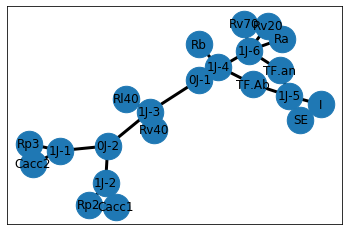

In [27]:
#G = nx.Graph(graph_dict)

options = {
    'node_size' : 700,
    'width': 3,
}
pos = nx.spring_layout(G)
nx.draw_networkx_nodes( G,pos, **options)
nx.draw_networkx_edges( G,pos, **options)
nx.draw_networkx_labels(G,pos, **options)

plt.show()

In [28]:
list(G.nodes)

['I',
 '1J-5',
 'TF.Ab',
 '1J-4',
 'Rb',
 'SE',
 '0J-1',
 '1J-3',
 'Rv40',
 'Rl40',
 '0J-2',
 '1J-2',
 'Cacc1',
 'Rp2',
 '1J-1',
 'Rp3',
 'Cacc2',
 'TF.an',
 '1J-6',
 'Ra',
 'Rv70',
 'Rv20']